In [7]:
import random
from math import *
import time
import operator

import pandas as pd
import numpy  as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse

from sklearn import datasets

In [8]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\iris.csv"

In [9]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [10]:
df_training.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [11]:
# copy the predictor variables into X and responses in y
X_df = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y_df = df_training['class']

In [12]:
X = X_df.values
y = y_df.values

# K-Fold 

- KFold divides all the samples in  groups of samples, called folds of equal sizes (if possible). 

- The prediction function is learned using (K - 1) folds, and the fold left out is used for test.

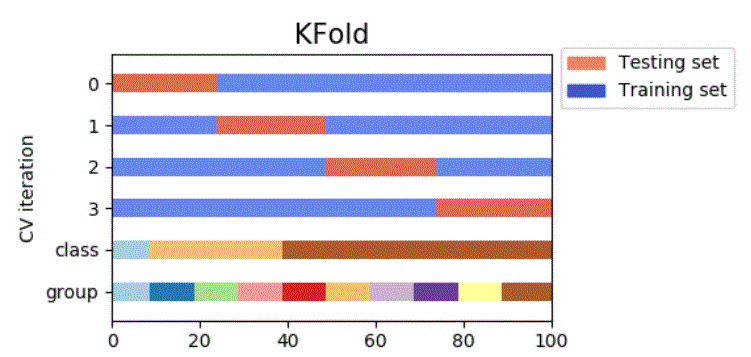

In [16]:
kf = KFold(n_splits=3, shuffle=False, random_state=100)

In [17]:
for train_idx, test_idx in kf.split(df_training):
    print(train_idx)
    print(test_idx)
    print('\n')

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
[50 51 52 53 54 55 56 57 58 59

Using KFold

In [18]:
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

results =  cross_val_score(estimator=knn, 
                              X=X, 
                              y=y, 
                              cv=kf, 
                              scoring='accuracy')

print('K-Fold accuracy scores : \n', results)
print('Mean score : \n', results.mean())

K-Fold accuracy scores : 
 [0. 0. 0.]
Mean score : 
 0.0


In [79]:
print(metrics.classification_report(y, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.96      0.97        50
 Iris-virginica       0.96      0.98      0.97        50

       accuracy                           0.98       150
      macro avg       0.98      0.98      0.98       150
   weighted avg       0.98      0.98      0.98       150



In [ ]:
kf

CV predict

In [ ]:
y_pred = cross_val_predict(knn, X, y, cv=kf)
print(metrics.confusion_matrix(y, y_pred))
print('Accuracy : ', metrics.accuracy_score(y, y_pred))

In [ ]:
df_training[100:150]['class'].value_counts()

# Repeated K-Fold

RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [81]:
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=11)

for train_idx, test_idx in rkf.split(df_training):
    print(train_idx)
    print(test_idx)
    print('\n')

[  1   3   4   5   7   8  10  13  14  17  18  19  20  21  23  24  25  26
  27  28  31  32  33  34  37  38  39  40  42  43  44  45  47  48  50  53
  54  55  57  59  61  64  67  68  70  71  72  73  74  76  78  79  80  81
  82  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101 102 106
 107 108 109 114 115 116 117 121 123 124 125 126 127 128 129 132 134 135
 136 137 138 140 141 143 144 146 147 148]
[  0   2   6   9  11  12  15  16  22  29  30  35  36  41  46  49  51  52
  56  58  60  62  63  65  66  69  75  77  83  84  85  98 103 104 105 110
 111 112 113 118 119 120 122 130 131 133 139 142 145 149]


[  0   2   5   6   7   9  10  11  12  13  14  15  16  22  23  24  27  29
  30  34  35  36  37  40  41  44  45  46  49  50  51  52  53  55  56  57
  58  59  60  62  63  64  65  66  67  69  70  71  74  75  76  77  79  80
  81  82  83  84  85  89  91  92  95  96  98  99 103 104 105 107 109 110
 111 112 113 114 115 118 119 120 121 122 124 125 126 128 129 130 131 132
 133 135 138 139 142 1

In [82]:
#### Using rKFold
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

kf_results =  cross_val_score(estimator=knn, 
                              X=X, 
                              y=y, 
                              cv=rkf, 
                              scoring='accuracy')

print('K-Fold accuracy scores : \n', kf_results)
print('Mean score : \n', kf_results.mean())

K-Fold accuracy scores : 
 [0.96 0.94 0.98 0.98 0.94 0.98]
Mean score : 
 0.9633333333333333


# Leave One Out (LOO)

- LeaveOneOut (or LOO) is a simple cross-validation. 
- Each learning set is created by taking all the samples except one, the test set being the sample left out. 
- Thus, for n samples, we have n different training sets and n different tests set. 

- This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [19]:
random_state = 100
loocv = LeaveOneOut()

# for train_idx, test_idx in loocv.split(df_training):
#     print(train_idx)
#     print(test_idx)
#     print('\n')

In [20]:
#### Using loocv
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

kf_results =  cross_val_score(estimator=knn, X=X, y=y, cv=loocv, scoring='accuracy')

print('LOOCV accuracy scores : \n', kf_results)
print('Mean score : \n', kf_results.mean())

LOOCV accuracy scores : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean score : 
 0.96


In [21]:
y_pred = cross_val_predict(knn, X, y, cv=loocv)
print(metrics.confusion_matrix(y, y_pred))
print('Accuracy : ', metrics.accuracy_score(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
Accuracy :  0.96


# Leave P Out (LPO)

LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing p  samples from the complete set. 

For n samples, this produces $n \choose p$ train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for  p > 1

In [22]:
#lpo = LeavePOut(p=20)

# for train_idx, test_idx in lpo.split(df_training):
#     print(train_idx)
#     print(test_idx)


# Stratified K-Folds cross-validator
 Provides train/test indices to split data in train/test sets.

 Parameters:
 n_splits : int, default=3
            Number of folds. Must be at least 2.

 shuffle  : boolean, optional
            Whether to shuffle each stratification of the data before 
            splitting into batches.

 random_state : int, RandomState instance or None, optional, default=None

                If int, random_state is the seed used by the random number 
                generator; 
                If RandomState instance, random_state is the random number 
                generator; 
                if None, the random number generator is the RandomState 
                instance used by np.random. Used when shuffle == True.

In [83]:
skf = StratifiedKFold(n_splits=3,  random_state=1)

In [84]:
for train_idx, test_idx in skf.split(X_df, y_df):
    print(train_idx)
    print(test_idx)
    print('\n')

[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 134 135 136 137 138 139 140
 141 142 143 144 145 1

In [85]:
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# weights : {'uniform', 'distance'}
# metric  : {’minkowski’ 'euclidean', 'manhattan', 'mahalanobis'}

# knn = KNeighborsClassifier(n_neighbors=5, 
#                            weights=’uniform’, 
#                            p=2, 
#                            metric=’minkowski’, 
#                            n_jobs=1)

# Scoring	Function
# ‘accuracy’	         sklearn.metrics.accuracy_score
# ‘average_precision’	 sklearn.metrics.average_precision_score
# ‘f1’	                 sklearn.metrics.f1_score
# ‘precision’	         sklearn.metrics.precision_score
# ‘recall’	             sklearn.metrics.recall_score
# ‘roc_auc’	             sklearn.metrics.roc_auc_score
# ['accuracy', 'adjusted_rand_score', 'average_precision', 
#  'f1', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 
#  'precision', 'r2', 'recall', 'roc_auc']

skf_results =  cross_val_score(estimator=knn, 
                               X=X, 
                               y=y, 
                               cv=skf, 
                               scoring='accuracy')

print('Stratified K-Fold accuracy scores : \n', skf_results)
print('Mean score : \n', skf_results.mean())

Stratified K-Fold accuracy scores : 
 [0.98039216 0.96078431 1.        ]
Mean score : 
 0.9803921568627452


In [86]:
y_pred = cross_val_predict(knn, X, y, cv=skf)
print(metrics.confusion_matrix(y, y_pred))
print('Accuracy : ', metrics.accuracy_score(y, y_pred))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
Accuracy :  0.98


In [87]:
print(metrics.classification_report(y, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.96      0.97        50
 Iris-virginica       0.96      0.98      0.97        50

       accuracy                           0.98       150
      macro avg       0.98      0.98      0.98       150
   weighted avg       0.98      0.98      0.98       150



# sklearn.model_selection.ShuffleSplit

Parameters:	
n_splits : int, default 10
Number of re-shuffling & splitting iterations.

test_size : float, int, None, default=0.1
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default (the parameter is unspecified), the value is set to 0.1. The default will change in version 0.21. It will remain 0.1 only if train_size is unspecified, otherwise it will complement the specified train_size.

train_size : float, int, or None, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [28]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])


In [29]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

#rs.get_n_splits(X)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [30]:
ssp = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.2, random_state=0)

for train_index, test_index in ssp.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


In [31]:
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

results =  cross_val_score(estimator=knn, 
                               X=X, 
                               y=y, 
                               cv=ssp, 
                               scoring='accuracy')

print('Stratified K-Fold accuracy scores : \n', skf_results)
print('Mean score : \n', skf_results.mean())

Stratified K-Fold accuracy scores : 
 [0.98039216 0.96078431 1.        ]
Mean score : 
 0.9803921568627452


In [33]:
# y_pred = cross_val_predict(knn, X, y, cv=ssp)
# print(metrics.confusion_matrix(y, y_pred))
# print('Accuracy : ', metrics.accuracy_score(y, y_pred))

# cross_validate function

The __cross_validate__ function differs from __cross_val_score__ in two ways:

    - It allows specifying multiple metrics for evaluation.
    - It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [46]:
from sklearn.model_selection import cross_validate

# copy the predictor variables into X and responses in y
X_df = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y_df = df_training['class']

# scoring = {'acc': 'accuracy',
#            'prec_macro': 'precision_macro',
#            'rec_micro': 'recall_macro'}
scoring = ['accuracy', 'precision_macro', 'recall_macro']

scores = cross_validate(knn, 
                        X=X_df, 
                        y=y_df, 
                        scoring=scoring, 
                        cv=5, 
                        return_train_score=True)

In [47]:
for key in scores:
    print(key, scores[key].mean())

fit_time 0.0021981716156005858
score_time 0.007395696640014648
test_accuracy 0.9666666666666668
train_accuracy 0.96
test_precision_macro 0.9707070707070707
train_precision_macro 0.9602233382079339
test_recall_macro 0.9666666666666668
train_recall_macro 0.9600000000000002


# Obtaining predictions by cross-validation

In [48]:
X = np.array([[0], [1], [2], [3], [4], [5]])
y = np.array(['a', 'a', 'a', 'b', 'b', 'b'])

In [53]:
cv = KFold(y, n_splits=3)

TypeError: __init__() got multiple values for argument 'n_splits'